In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cudaviz.mandelbrot import mandelbrot
from cudaviz.diffusion import naiive_diffusion
import numpy as np

In [2]:
colors = ['#76b900', '#000000']
cmap = LinearSegmentedColormap.from_list("nvidia_green_to_black", colors)

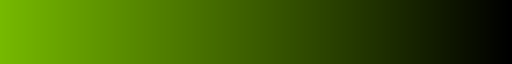

In [3]:
cmap

In [7]:
N=10000
max_iter=200
# x_center = -0.75
# y_center = 0.0
x_center = -0.7
y_center = 0.35
zoom = 0.001

grid = mandelbrot(N=N, max_iter=max_iter, x_center=x_center, y_center=y_center, zoom=zoom)

[]

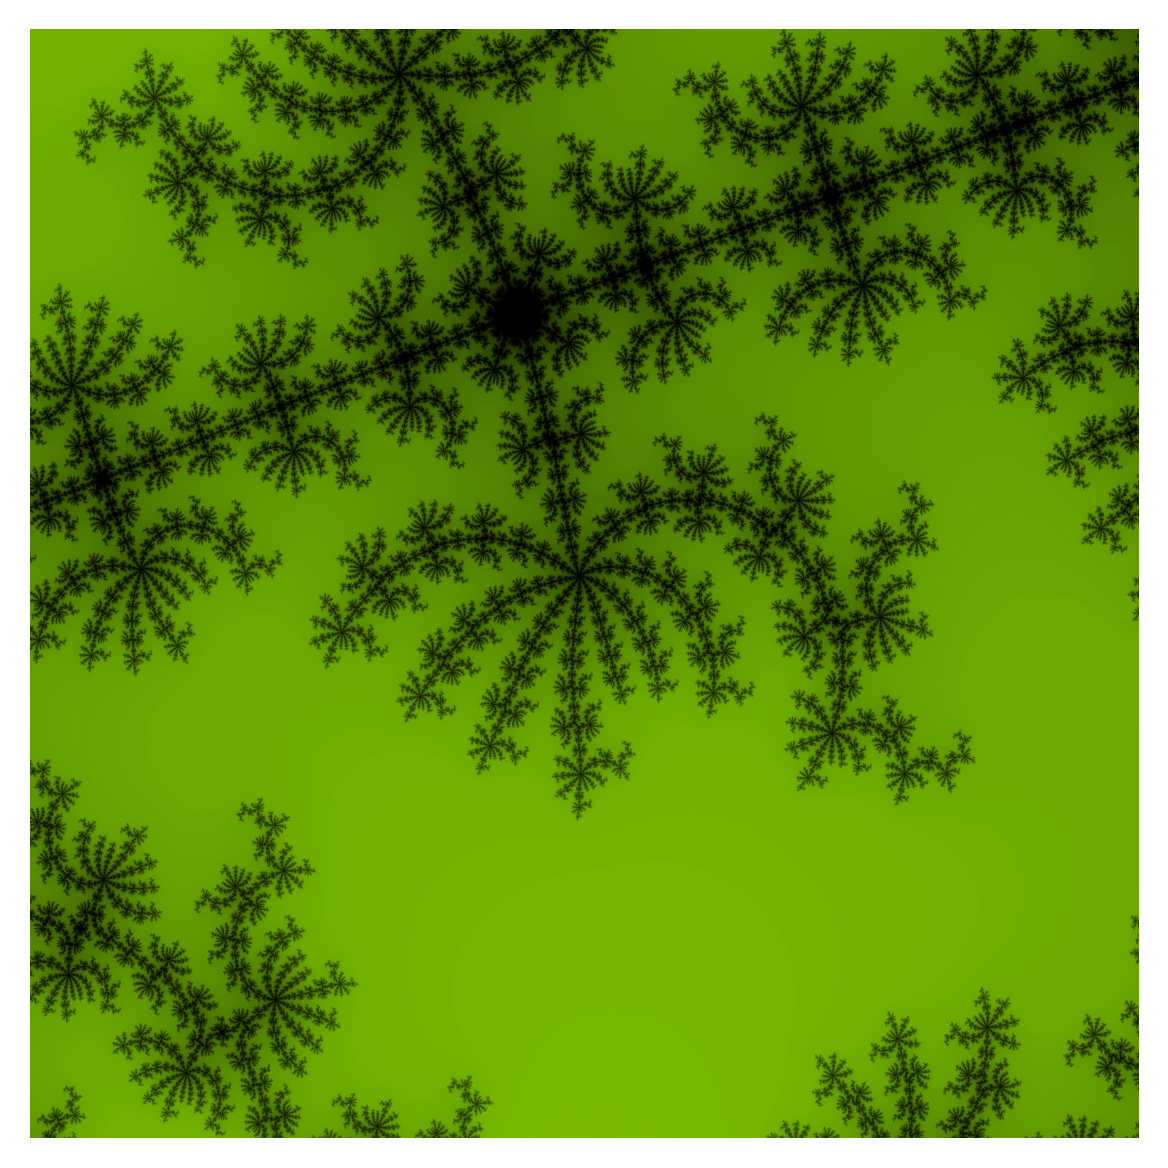

In [5]:
fig, ax = plt.subplots(dpi=300)

ax.imshow(grid, cmap=cmap)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

In [ ]:
# for stability
# 0.1 * D <= alpha_stable = 0.25
# D <= 2.5

In [36]:
data = np.array(naiive_diffusion(nx=256, ny=256, nt=100, central_temperature = 5, spread=2**10, d = 2.5))

In [37]:
%matplotlib inline
from matplotlib import rc
rc('animation', html='jshtml')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
im = ax.imshow(data[0], cmap='coolwarm', vmin=data.min(), vmax=data.max())
cbar = fig.colorbar(im, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)

def update(frame):
    im.set_data(data[frame])
    return [im]

ani = FuncAnimation(fig, update, frames=len(data), blit=True, interval=100);

In [39]:
ani

In [55]:
b = data[1] - data[0]

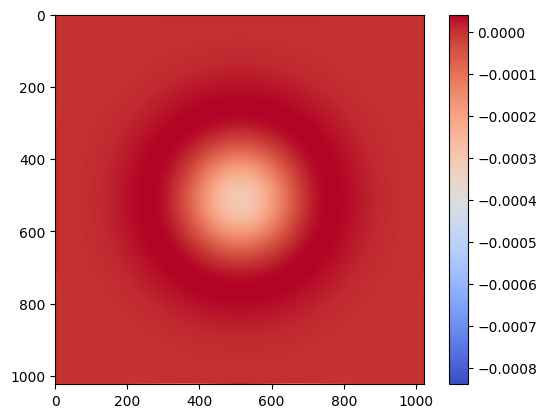

In [57]:
fig, ax = plt.subplots()

im = ax.imshow(b, cmap='coolwarm', vmin=b.min(), vmax=b.max());
cbar = ax.figure.colorbar(im)

plt.show()

In [44]:
data[-1]

array([[ 456849.40625,       0.     ,  973518.5    , ..., 1004599.8125 ,
              0.     ,  471433.3125 ],
       [      0.     , 1413830.125  ,       0.     , ...,       0.     ,
        1458968.125  ,       0.     ],
       [ 973517.875  ,       0.     , 2063337.5    , ..., 2129226.75   ,
              0.     , 1004600.1875 ],
       ...,
       [1004621.1875 ,       0.     , 2129277.75   , ..., 2197183.75   ,
              0.     , 1036652.25   ],
       [      0.     , 1458998.     ,       0.     , ...,       0.     ,
        1505516.125  ,       0.     ],
       [ 471442.1875 ,       0.     , 1004621.4375 , ..., 1036652.4375 ,
              0.     ,  486473.125  ]], shape=(1024, 1024))